In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [28]:
data = pd.read_csv('gym_members_exercise_tracking.csv')

# EDA (Exploratory Data Analysis)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\1447058742.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience_Level', data=data, palette='pastel')


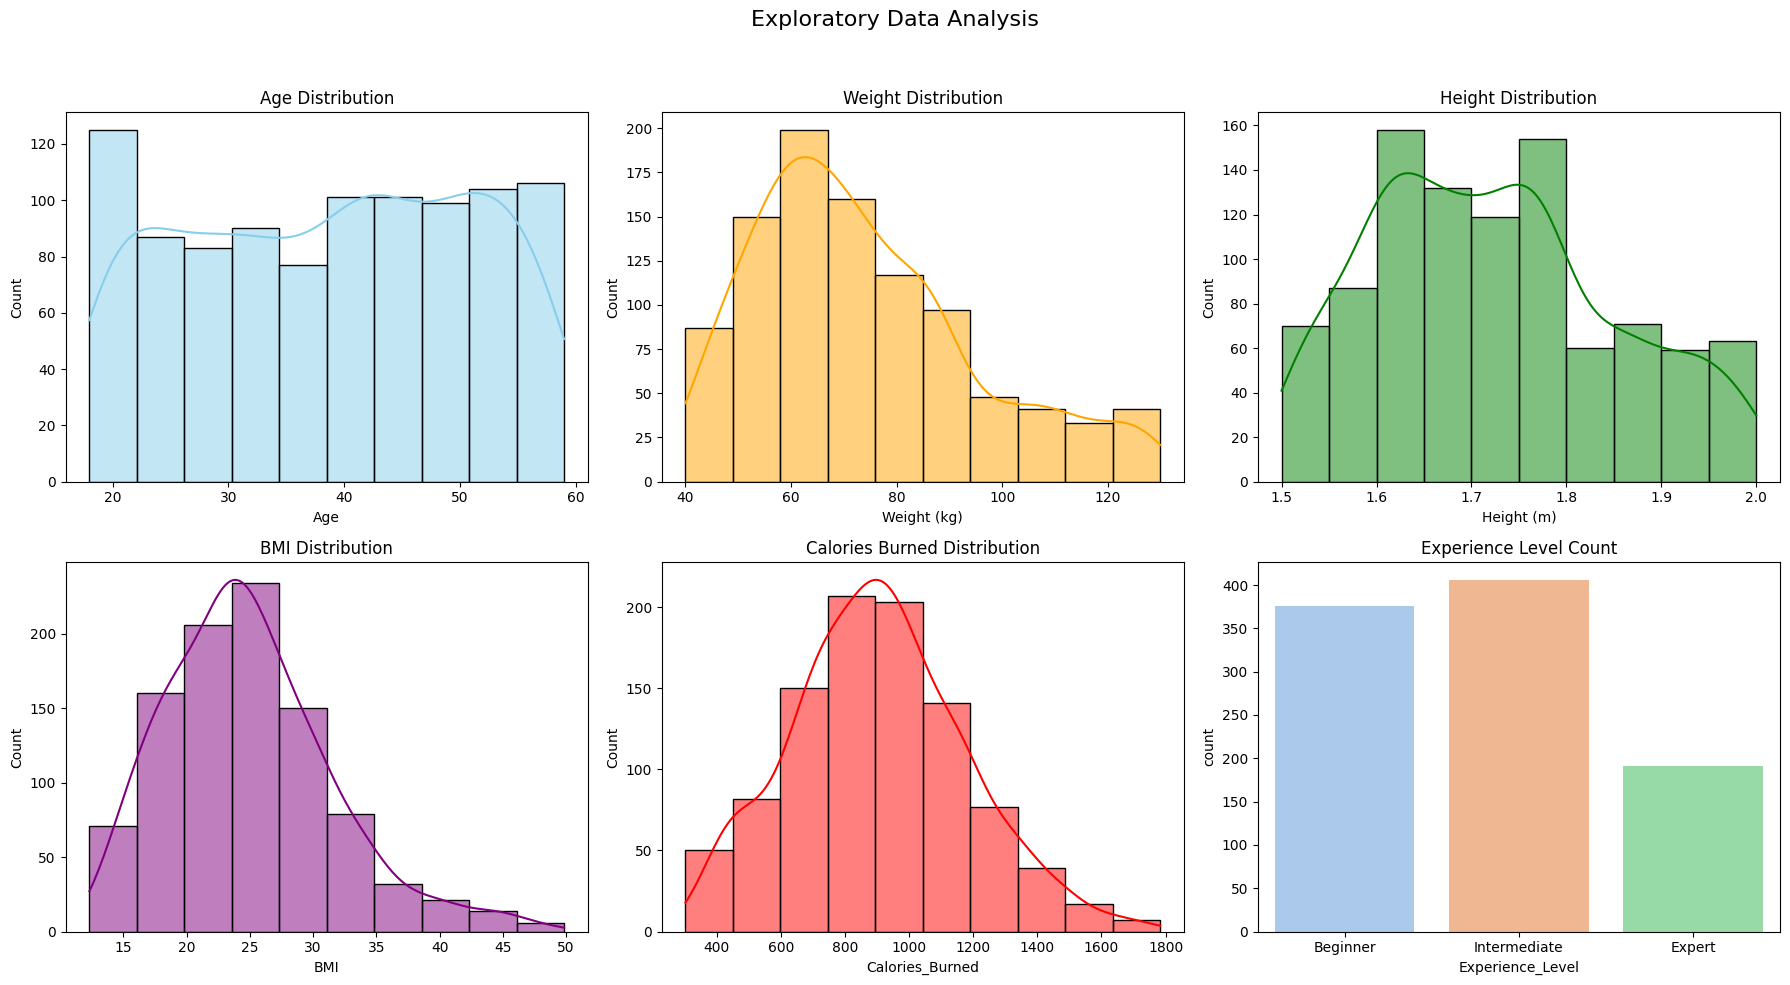

In [29]:
plt.figure(figsize=(18, 10))
plt.suptitle("Exploratory Data Analysis", fontsize=16)

plt.subplot(2, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution")

plt.subplot(2, 3, 2)
sns.histplot(data['Weight (kg)'], bins=10, kde=True, color='orange')
plt.title("Weight Distribution")

plt.subplot(2, 3, 3)
sns.histplot(data['Height (m)'], bins=10, kde=True, color='green')
plt.title("Height Distribution")

plt.subplot(2, 3, 4)
sns.histplot(data['BMI'], bins=10, kde=True, color='purple')
plt.title("BMI Distribution")

plt.subplot(2, 3, 5)
sns.histplot(data['Calories_Burned'], bins=10, kde=True, color='red')
plt.title("Calories Burned Distribution")

plt.subplot(2, 3, 6)
experience_labels = ['Beginner', 'Intermediate', 'Expert']
sns.countplot(x='Experience_Level', data=data, palette='pastel')
plt.xticks(ticks=[0, 1, 2], labels=experience_labels)
plt.title("Experience Level Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##### AGE : All age member's in gym of equal amount
##### WEIGHT : Maximum People Height Beetween 50kg to 70kg
##### HEIGHT : Maximum Gym members height is 1.6 to 1.8 meter
##### CALORIES : Average member Calories Burning range is 800 to 1000
##### LEVEL : Most of gym memer are Begginer's or Intermediate .there are less member who is expert

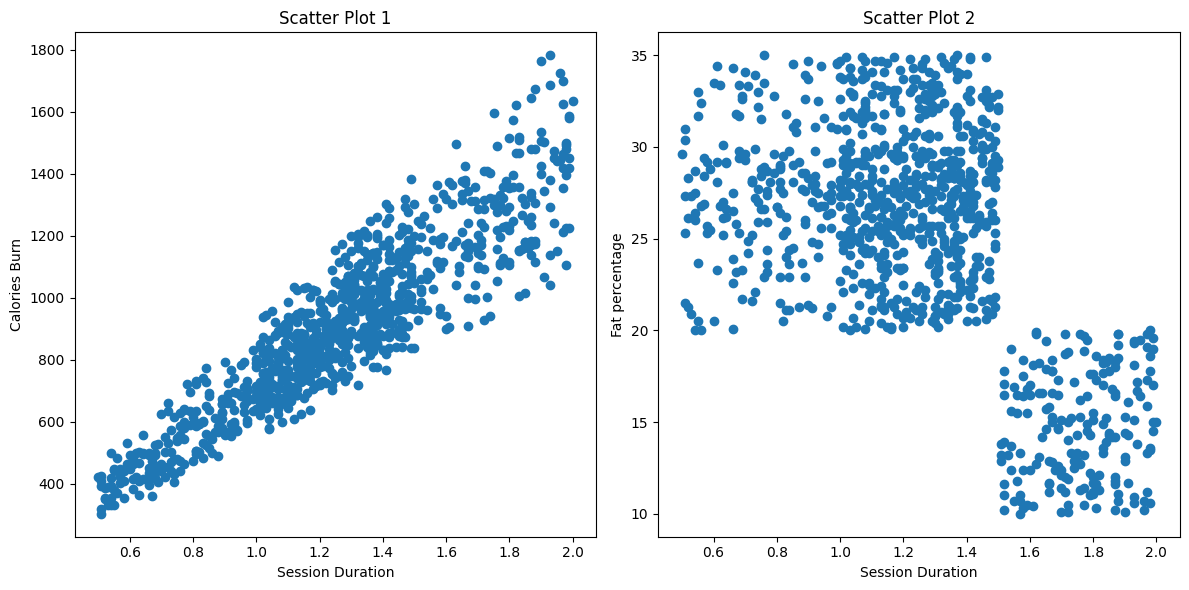

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
axes[0].scatter(x=data['Session_Duration (hours)'],y=data['Calories_Burned'])
axes[0].set_title('Scatter Plot 1')
axes[0].set_xlabel('Session Duration')
axes[0].set_ylabel('Calories Burn')

# Scatter plot on the second subplot
axes[1].scatter(x=data['Session_Duration (hours)'],y=data['Fat_Percentage'])
axes[1].set_title('Scatter Plot 2')
axes[1].set_xlabel('Session Duration')
axes[1].set_ylabel('Fat percentage')

# Adjust the layout
plt.tight_layout()
plt.show()

##### Here positive correlation between session duration and clalories burn as the session duration increase, so does the Calories burn increase And session duration increase body fat percentage decriese 

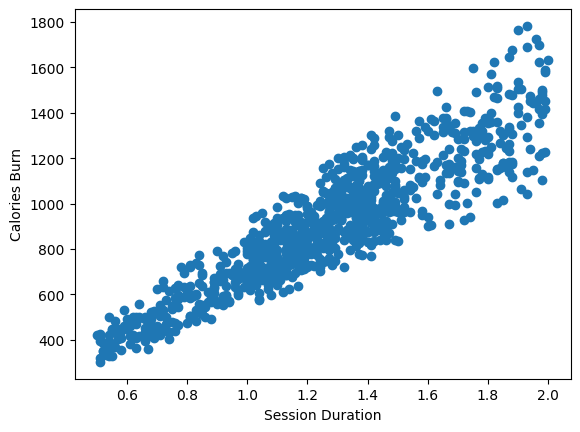

In [31]:
plt.scatter(x=data['Session_Duration (hours)'],y=data['Calories_Burned'])
plt.xlabel('Session Duration')
plt.ylabel('Calories Burn')
plt.show()

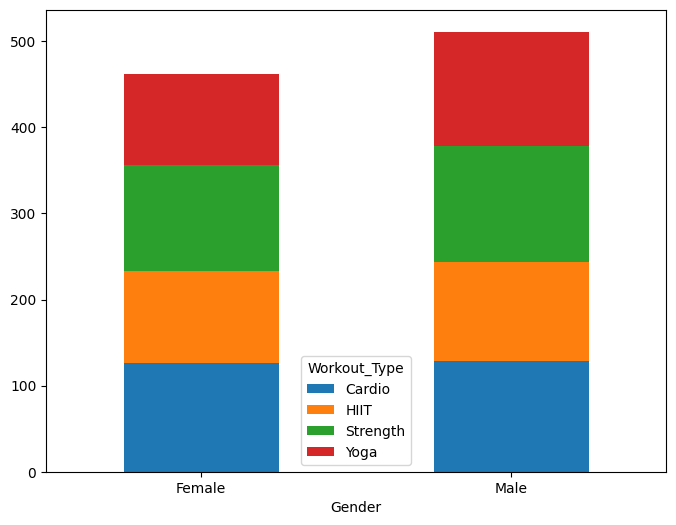

In [32]:
data.groupby(['Gender','Workout_Type']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,6))
plt.xticks(rotation="horizontal")
plt.show()

##### All male and female doing all exersice workout type in equally

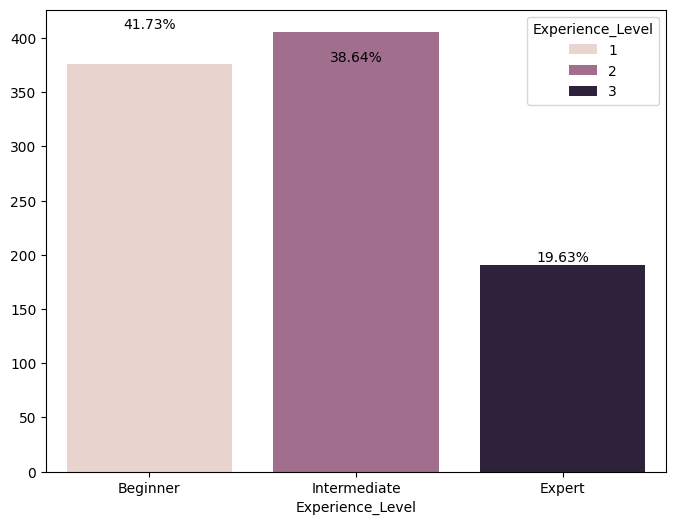

In [33]:
plt.figure(figsize=(8,6))
val = data['Experience_Level'].value_counts()
sns.barplot(x =val.index,y=val.values,hue=val.index)
label = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(label)),labels=label,rotation = 0)
for index,value in enumerate(val):
    plt.text(index,value,str(round(value * 100 / len(data),2)) + '%',ha='center',va='bottom')
plt.show()

##### there Are 41% people is biginner and 40% people in intermediate people and 20% people is Expert in gym

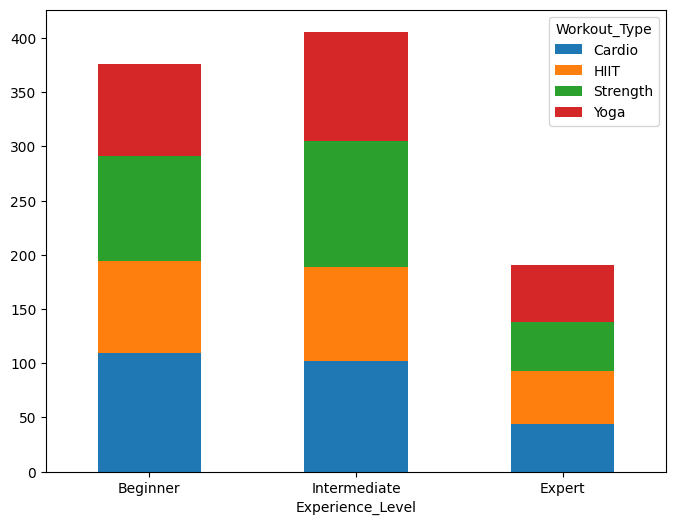

In [34]:
data.groupby(['Experience_Level','Workout_Type']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,6))
labels = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

##### All experiance level people doing workout type equally

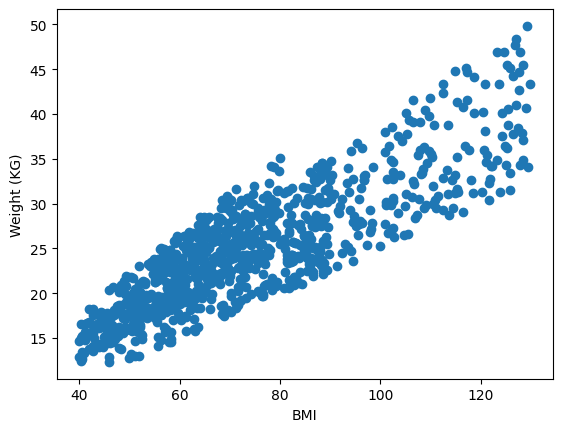

In [35]:
plt.scatter(x = data['Weight (kg)'], y = data['BMI'])
plt.xlabel('BMI')
plt.ylabel('Weight (KG)')
plt.show()

##### We can see the positive correlation between BMI and Weight if weight Increase than BMI(Body mass index) Also Increase

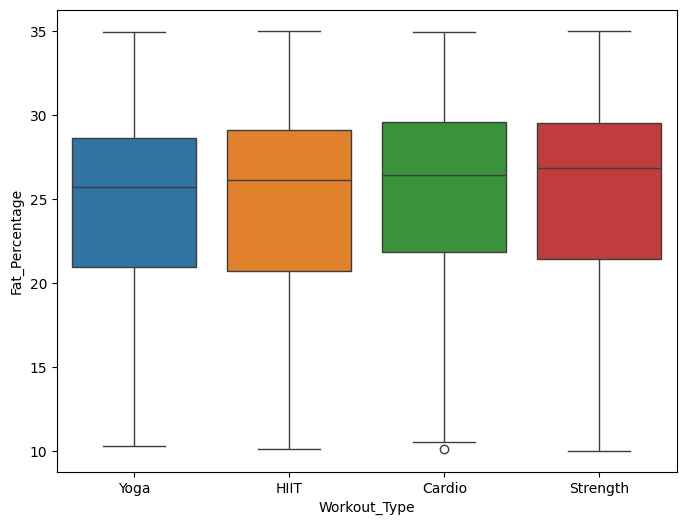

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x=data['Workout_Type'],y=data['Fat_Percentage'],hue=data['Workout_Type'])
plt.show()

##### Almost all type of Workout burn same percentage of body fat

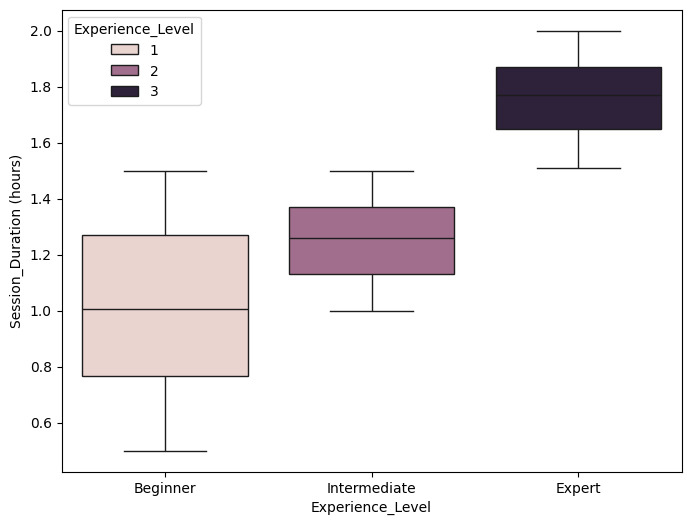

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x=data['Experience_Level'],y=data['Session_Duration (hours)'],hue=data['Experience_Level'])
labels = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

##### Expert gym member spend most of the time in gym than other and intermediate do exersice time more than Beginners. Gym has large amount of Begginers and less member in intermediate and expert

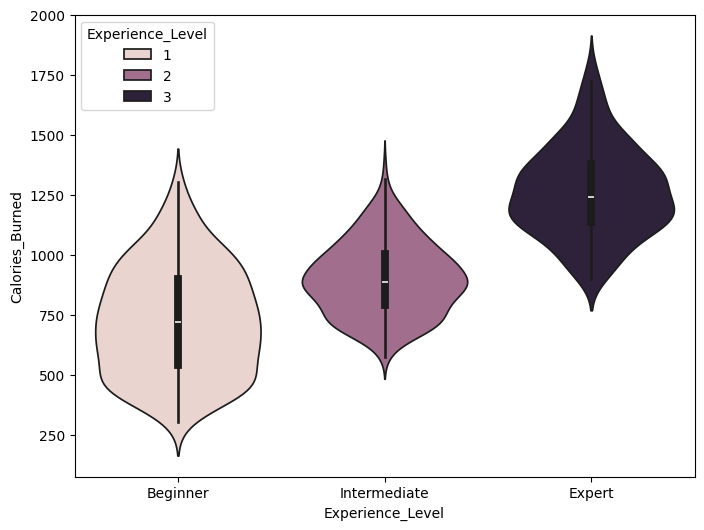

In [38]:
plt.figure(figsize=(8,6))
sns.violinplot(data=data,x=data['Experience_Level'],y=data['Calories_Burned'],hue=data['Experience_Level'])
labels = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

##### Expert gym member burn more calories than other becuse their session duretion is hight 

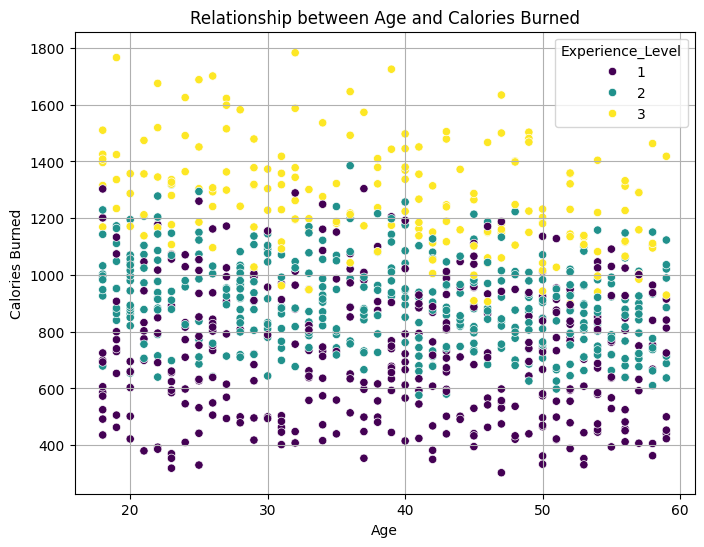

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Calories_Burned', data=data, hue='Experience_Level', palette='viridis')
plt.title('Relationship between Age and Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

In [40]:
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])
data['Workout_Type'] = label.fit_transform(data['Workout_Type'])

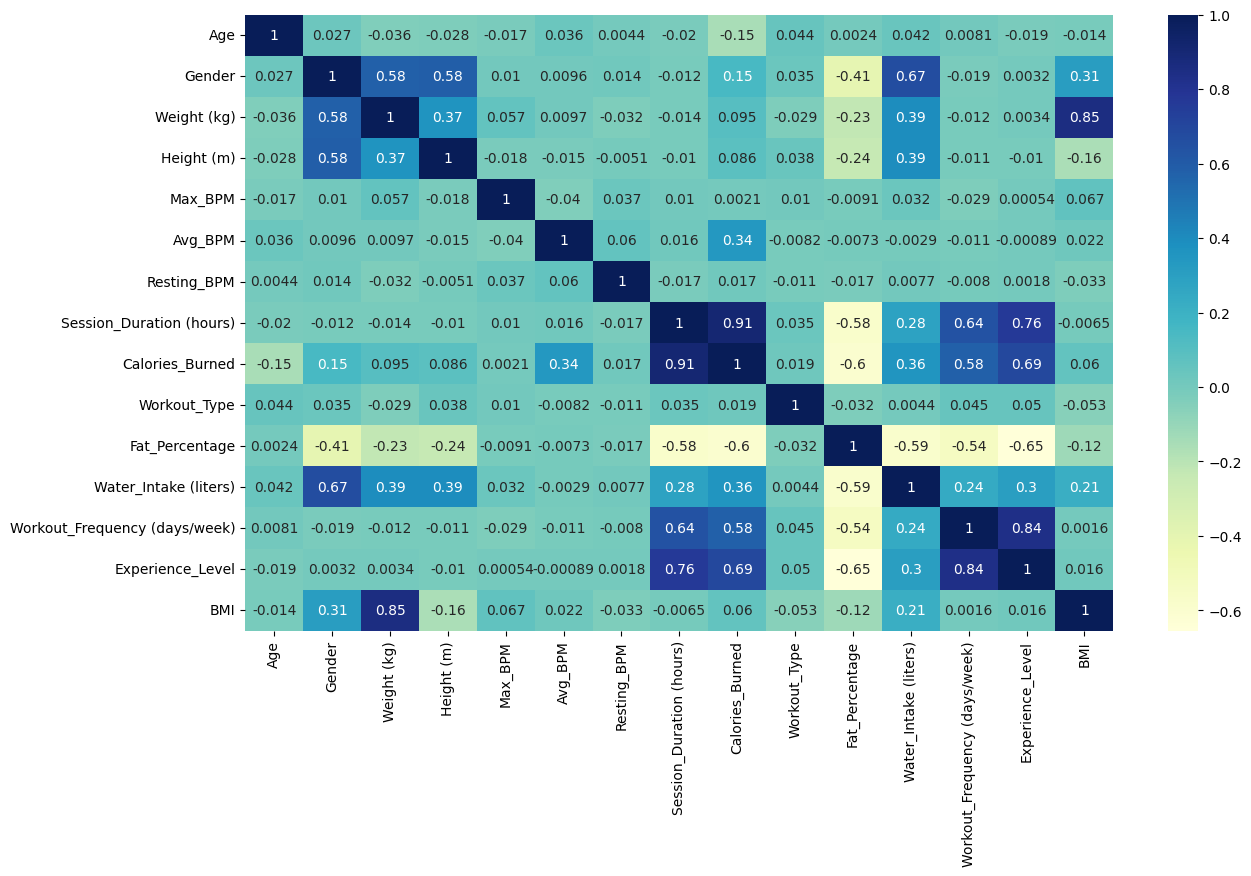

In [41]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.savefig('my.png')
plt.show()

##### The strongest positive correlation is between BMI and Weight (kg), with a correlation coefficient of 0.85. Other strong positive correlations include:

##### BMI and Gender: 0.31
##### BMI and Water Intake (liters): 0.21
##### BMI and Frequency (days/week): 0.84
##### BMI and Experience_Level: 0.84
##### This indicates that BMI is strongly influenced by these variables.

##### Additionally, the strong positive correlation between Water Intake (liters) and BMI suggests that drinking more water may lead to higher BMI.

####